## Setup dependencies

In [1]:
import sys
import datetime as dt;
mods = sys.modules
print("Mods: ", mods)
# display python version and date/time
from numpy import iterable
from pythonCode.CombFilterClass import CombFilterClass
from pythonCode.FilterClass import FilterClass

print(dt.datetime.today());
print(sys.version)

# google colab specific code
if 'google.colab' in sys.modules:
    try:
        import google.colab
        import subprocess
        import os.path
        p = subprocess.run(['git', 'rev-parse', '--is-inside-work-tree'], stdout=subprocess.PIPE, universal_newlines=True)
        if p.stdout == 'true\n':
            !git pull
        else:
            if not os.path.isdir('city_dsp_ap'):
                !git clone --depth 1 -q https://github.com/jpauwels/city_dsp_ap.git
            %cd city_dsp_ap
    except:
        %cd city_dsp_ap
else:
    print("Skipped google colab specific code");

Mods:  {'sys': <module 'sys' (built-in)>, 'builtins': <module 'builtins' (built-in)>, '_frozen_importlib': <module 'importlib._bootstrap' (frozen)>, '_imp': <module '_imp' (built-in)>, '_thread': <module '_thread' (built-in)>, '_warnings': <module '_warnings' (built-in)>, '_weakref': <module '_weakref' (built-in)>, 'zipimport': <module 'zipimport' (built-in)>, '_frozen_importlib_external': <module 'importlib._bootstrap_external' (frozen)>, '_io': <module 'io' (built-in)>, 'marshal': <module 'marshal' (built-in)>, 'nt': <module 'nt' (built-in)>, 'winreg': <module 'winreg' (built-in)>, 'encodings': <module 'encodings' from 'C:\\Users\\jacqu\\anaconda3\\envs\\DSP_Labs\\lib\\encodings\\__init__.py'>, 'codecs': <module 'codecs' from 'C:\\Users\\jacqu\\anaconda3\\envs\\DSP_Labs\\lib\\codecs.py'>, '_codecs': <module '_codecs' (built-in)>, 'encodings.aliases': <module 'encodings.aliases' from 'C:\\Users\\jacqu\\anaconda3\\envs\\DSP_Labs\\lib\\encodings\\aliases.py'>, 'encodings.utf_8': <module

In [7]:
# Repeat initialisations to allow running from this section
import sys
import datetime as dt;

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Audio
from scipy import fft
plt.rcParams['figure.figsize'] = (13,8) # increase the default size of the plots

# display python version and date/time

print(dt.datetime.today());
print(sys.version)

# google colab specific code
if 'google.colab' in sys.modules:
    %ls data/digits-*.txt
else:
    %ls data



2021-04-09 12:19:43.436077
3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
 Volume in drive C is OS
 Volume Serial Number is F287-2376

 Directory of C:\Users\jacqu\city\DS2020\Modules\DigitalSignalProcessing\Coursework\CourseworkWip\data

13/02/2021  16:30    <DIR>          .
13/02/2021  16:30    <DIR>          ..
13/02/2021  11:45         1,934,417 digits-test.txt
13/02/2021  11:45         3,966,946 digits-training.txt
13/02/2021  11:45         1,048,736 energy_usage.pkl
13/02/2021  11:45           119,126 financial_data.csv
13/02/2021  16:30    <DIR>          images
13/02/2021  11:45        15,604,951 power_consumption.csv
               5 File(s)     22,674,176 bytes
               3 Dir(s)  88,052,887,552 bytes free


## Digit recognition (UG & PG)

In this part, you're going to use images of handwritten digits ranging from 0 to 9. They are split in a training set and a test set and stored as text files in `data/digits-training.txt` and `data/digits-test.txt`.

In [9]:
%ls data/digits-*.txt

Parameter format not correct - "digits-*.txt".


Since the text files have a custom format, a class to encapsulate image loading and display is prodived

In [13]:
from itertools import islice
import re
from pythonCode.ImageClass import ImageClass

#### Load training images

Image class init


'Loaded 1934 images and 1934 labels.'

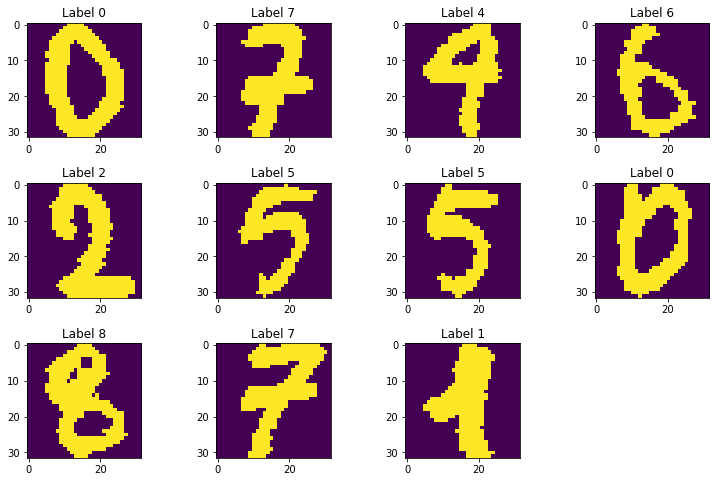

In [14]:
trainingImages = ImageClass()
trainingImages.readImages('data/digits-training.txt')
trainingImages.displayImages([0, 10, 20, 54, 78, 21, 65, 89, 100, 143, 155, 156])

#### Load test images

Image class init


'Loaded 943 images and 943 labels.'

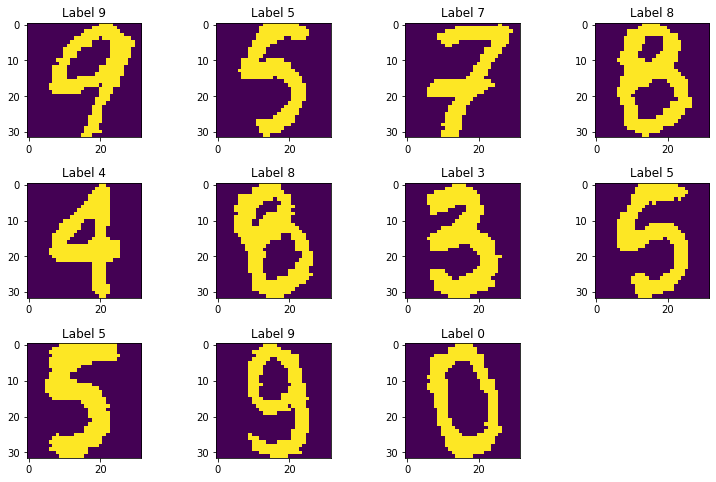

In [22]:
testImages = ImageClass()
testImages.readImages('data/digits-test.txt')
testImages.displayImages([0, 10, 20, 54, 78, 21, 65, 89, 100, 143, 155, 156])

All digits and their associated labels have now been read into lists, so we can use list indexing to access them and, for instance, display them as below.

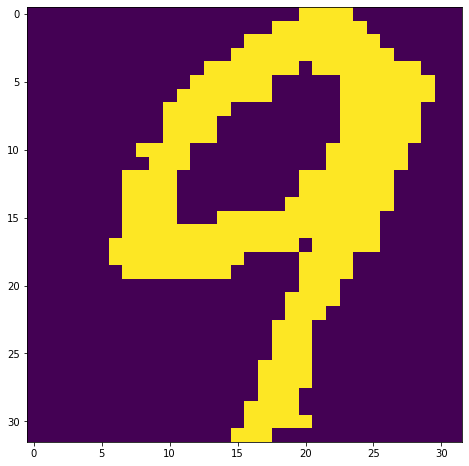

Image of digit 9


In [23]:
index = 1
plt.figure()
plt.imshow(trainingImages.digitPixels[index])
plt.show()
print('Image of digit {}'.format(trainingImages.digitLabels[index]))

Using this data, your task is to:

1. Create a function for comparing each test image with the collection of training images, using the correlation with each training image without offset (i.e. calculate the sum of the element-wise multiplied images).
2. Estimate the most likely label for each test image by matching with the training image that has maximal correlation.
3. Estimate the accuracy of your system, as a fraction of the correctly estimated test labels over the total number of test images.
4. Use the two-dimensional correlation function [`signal.correlate2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html) to find the best match over all image offsets. For efficiency you can use a subset of the training images, or calculate an average of the training images.
5. Implement variants of the digit recognition system, e.g.
    - use the negatives of the training and test images instead of the positive images
    - use images that are slightly rotated in your training set (using [`rotate`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.rotate) from the `scikit-image.transform` library)
    - use images with some noise added in your training set (using [`random_noise`](https://scikit-image.org/docs/dev/api/skimage.util.html#random-noise) from the `scikit-image.util` library)
6. Report the accuracy of the new system and compare with the accuracy of the previous systems.
7. In the written report, discuss and reason about the different performances of your classifiers.

without offset is without x & y axis.
when looking for correlation only small offets as done in mono conversion.

In [25]:
from  pythonCode.ImageCorrelation import ImageCorrelation

correlation = ImageCorrelation()
correlation.correlate(testImages.digitPixels[0], trainingImages.digitLabels[0])

Shape 1: (32, 32)


AttributeError: 'int' object has no attribute 'shape'

## Time series prediction with financial data (UG pairs & PG)

In this part, you're going to use long term US stock market data (monthly indices, dividends, earnings, etc. since 1871). Information about the data provenance and references can be found at http://www.econ.yale.edu/~shiller/data.htm (especially the 2nd paragraph). The data is available in the file `data/financial_data.csv`.

It is stored as comma-separated numerical values, with a header containing column names. Therefore we can use [`np.genfromtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt) to read it.

In [15]:
financial = np.genfromtxt('data/financial_data.csv', delimiter=',', skip_header=2, names=True)

The result is a structured array, which means that we can access each of the columns in the table by its name. The list of all colums can be found below.

In [16]:
financial.dtype.names

('Date',
 'SP_Comp_P',
 'Dividend_D',
 'Earnings_E',
 'Consumer_Price_Index_CPI',
 'Date_Fraction',
 'Long_Interest_Rate_GS10',
 'Real_Price',
 'Real_Dividend',
 'Real_Earnings',
 'Cyclically_Adjusted_Price_Earnings_Ratio_PE10_or_CAPE')

You can access the columns using their names between square brackets, like you would for a dictionary. It's advised to store the columns you need in helper variables, to avoid long statements resulting from the long column names.

In [17]:
date = financial['Date']
real_price = financial['Real_Price']

Now you can easily use the data, for instance to plot it.

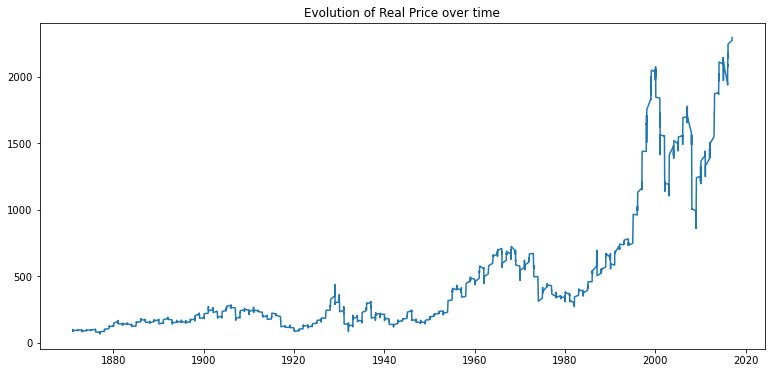

In [18]:
plt.figure()
plt.plot(date, real_price)
plt.title('Evolution of Real Price over time')
plt.show()

Using this data, your task is to:

1. Look for long term trends on a linear and log scale and de-trend the data first.
2. Calculate the FFT of the signal of interest, to estimate possible periodicities. You can use a window to avoid spectral leaking.
3. Refine your analysis by adjusting the size of the dataset (e.g. if you model annual patterns, make sure your dataset size is a multiple of 12).

In [19]:
# write your code here